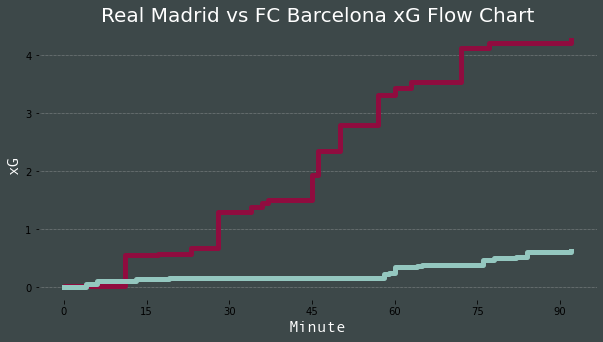

In [1]:
#import packages
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# import the dataset
df = pd.read_csv("MadridvsBarcaxGDataset.csv")

#now that we have our dataframe set up, we are going to create some lists to plot the different xG values
#4 lists - home and away xg and minutes
#We start these with zero so our charts will start at 0
a_xG = [0]
h_xG= [0]
a_min = [0]
h_min = [0]

#this finds our team names from the dataframe. This will only work as long as both teams took a shot
hteam = df['team'].iloc[0]  # will get the first record (usually the home team)
ateam = df['team'].iloc[-1]# will get the last record (the away team)

'''
# iterate to the loop to populate the lists a_xG and h_xG previously created
# what the loop is doing here is checking if the record df[team][index] is equal to ateam(away), if true it will append the xG values into a_xG list
'''

for x in range(len(df['xG'])):
    if df['team'][x]==ateam:
        a_xG.append(df['xG'][x])
        a_min.append(df['minute'][x])
    if df['team'][x]==hteam:
        h_xG.append(df['xG'][x])
        h_min.append(df['minute'][x])
        
#this is the function we use to make our xG values be CUMULATIVE rather than single shot values
#it goes through the list and adds the numbers together
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]        

a_cumulative = nums_cumulative_sum(a_xG)
h_cumulative = nums_cumulative_sum(h_xG)

#this is used to find the total xG. It just creates a new variable from the last item in the cumulative list
alast = round(a_cumulative[-1],2)
hlast = round(h_cumulative[-1],2)


# the graph part

fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

#set up our base layer
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)
        
plt.xticks([0,15,30,45,60,75,90])
plt.xlabel('Minute',fontname='Andale Mono',color='white',fontsize=16)
plt.ylabel('xG',fontname='Andale Mono',color='white',fontsize=16)
# plt.suptitle("tuvieja", y=1.05, fontsize=18)
plt.title("Real Madrid vs FC Barcelona xG Flow Chart", color = 'white', fontsize=20)

#plot the step graphs
ax.step(x=a_min,y=a_cumulative,color='#900C3F',label=ateam,linewidth=5,where='post')
ax.step(x=h_min,y=h_cumulative,color='#94C7BF',label=ateam,linewidth=5,where='post')

# FOR HTML COLOR CODES : https://htmlcolorcodes.com/